In [428]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [429]:
#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [430]:
#set up seed for consistancy
torch.manual_seed(1)
#batch_size = 64
def batchData(batch_size):
        #get MNIST dataset
    data_train = torchvision.datasets.MNIST(root='./data', 
                                               train=True, 
                                               transform=transforms.ToTensor(),  
                                               download=True)

    data_test = torchvision.datasets.MNIST(root='./data', 
                                              train=False, 
                                              transform=transforms.ToTensor(),
                                              download=True)
    train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                              shuffle=True)

    test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                             shuffle=False)
    
    return train_loader,test_loader

In [431]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(10, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(16*5*5, 20), 
            nn.ReLU(),
            nn.Linear(20, 10)
        )

    def forward(self, x):
        outputs = self.convolution(x)
        return outputs

In [453]:
model_one = CNN_1().to(device)



In [454]:
def trainModel(model,num_epochs):
    n_total_steps = len(train_loader)
    loss_train = []
    epochs = []
    accuracy_train = []
    print('Training the model')
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        n_correct = 0
        n_samples = 0
        count = 0 
        loss_per_batch = 0
        for i, (inputs, labels) in enumerate(train_loader): 
            count +=1
            # get the inputs; data is a list of [inputs, labels]
            #inputs, labels = data
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer_sgd.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs).to(device)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer_sgd.step()
            loss_per_batch += loss.data
            # print statistics
            #running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy : {acc} %')
                #loss_train.append(loss.item())
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy : {acc} %')
        epochs.append(epoch)
        accuracy_train.append(acc)
        loss_per_batch /= count
        loss_train.append(loss_per_batch)
    print('Training done')            
    return epochs,loss_train,accuracy_train

In [455]:
learning_rate = 0.001
loss_func = nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.SGD(model_one.parameters(), lr=learning_rate)

In [456]:
train_loader, test_loader = batchData(64)
epochs,loss_train,accuracy_train=trainModel(model_one,20)
model1_parameters = torch.nn.utils.parameters_to_vector(model_one.parameters())

Training the model
Epoch [1/20], Step [100/938], Loss: 2.2875, Accuracy : 12.421875 %
Epoch [1/20], Step [200/938], Loss: 2.2912, Accuracy : 12.515625 %
Epoch [1/20], Step [300/938], Loss: 2.3145, Accuracy : 12.572916666666666 %
Epoch [1/20], Step [400/938], Loss: 2.2941, Accuracy : 12.90625 %
Epoch [1/20], Step [500/938], Loss: 2.3221, Accuracy : 13.071875 %
Epoch [1/20], Step [600/938], Loss: 2.2951, Accuracy : 13.3828125 %
Epoch [1/20], Step [700/938], Loss: 2.2939, Accuracy : 13.703125 %
Epoch [1/20], Step [800/938], Loss: 2.2814, Accuracy : 13.90234375 %
Epoch [1/20], Step [900/938], Loss: 2.3053, Accuracy : 14.104166666666666 %
Epoch [1/20], Loss: 2.2845, Accuracy : 14.165 %
Epoch [2/20], Step [100/938], Loss: 2.2702, Accuracy : 15.4375 %
Epoch [2/20], Step [200/938], Loss: 2.2856, Accuracy : 15.984375 %
Epoch [2/20], Step [300/938], Loss: 2.2880, Accuracy : 16.401041666666668 %
Epoch [2/20], Step [400/938], Loss: 2.2886, Accuracy : 16.6875 %
Epoch [2/20], Step [500/938], Loss: 2

In [457]:
learning_rate = 0.001
loss_func = nn.CrossEntropyLoss()
model_two = CNN_1().to(device)
optimizer_sgd = torch.optim.SGD(model_two.parameters(), lr=learning_rate)
train_loader, test_loader = batchData(512)
epochs,loss_train,accuracy_train=trainModel(model_two,20)

Training the model
Epoch [1/20], Step [100/118], Loss: 2.3074, Accuracy : 9.74609375 %
Epoch [1/20], Loss: 2.3085, Accuracy : 9.751666666666667 %
Epoch [2/20], Step [100/118], Loss: 2.3045, Accuracy : 9.759765625 %
Epoch [2/20], Loss: 2.3052, Accuracy : 9.751666666666667 %
Epoch [3/20], Step [100/118], Loss: 2.3083, Accuracy : 9.80078125 %
Epoch [3/20], Loss: 2.3048, Accuracy : 9.751666666666667 %
Epoch [4/20], Step [100/118], Loss: 2.2986, Accuracy : 9.72265625 %
Epoch [4/20], Loss: 2.3076, Accuracy : 9.751666666666667 %
Epoch [5/20], Step [100/118], Loss: 2.3045, Accuracy : 9.74609375 %
Epoch [5/20], Loss: 2.3084, Accuracy : 9.751666666666667 %
Epoch [6/20], Step [100/118], Loss: 2.3073, Accuracy : 9.763671875 %
Epoch [6/20], Loss: 2.2922, Accuracy : 9.75 %
Epoch [7/20], Step [100/118], Loss: 2.2986, Accuracy : 9.876953125 %
Epoch [7/20], Loss: 2.2829, Accuracy : 9.753333333333334 %
Epoch [8/20], Step [100/118], Loss: 2.3043, Accuracy : 9.830078125 %
Epoch [8/20], Loss: 2.2945, Accur

In [458]:
model2_parameters = torch.nn.utils.parameters_to_vector(model_two.parameters())
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*model1_parameters + alpha[i]* model2_parameters
    thetaArr.append(theta)

In [459]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [460]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)



for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* model1_parameters + alpha[i]*model2_parameters
    model = CNN_1()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    tmp = []
    for param in model.parameters():
        tmp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_func)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_func)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

Text(0.5, 1.0, 'Flatness vs Generalization part 1')

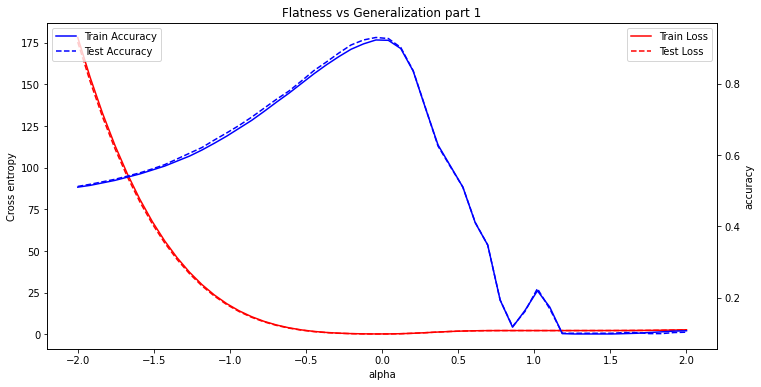

In [461]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r")
plt.plot(alpha, alpha_test_loss_arr, color = "r",linestyle='--')
plt.legend(['Train Loss' , 'Test Loss'])
plt.ylabel('Cross entropy')
plt.xlabel('alpha')
plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "b",linestyle='--')
plt.legend(['Train Accuracy' , 'Test Accuracy'],loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.title('Flatness vs Generalization part 1')

Training the model
Epoch [1/20], Step [100/600], Loss: 2.2904, Accuracy : 10.12 %
Epoch [1/20], Step [200/600], Loss: 2.3086, Accuracy : 9.975 %
Epoch [1/20], Step [300/600], Loss: 2.3118, Accuracy : 9.956666666666667 %
Epoch [1/20], Step [400/600], Loss: 2.2988, Accuracy : 9.8875 %
Epoch [1/20], Step [500/600], Loss: 2.2948, Accuracy : 9.846 %
Epoch [1/20], Step [600/600], Loss: 2.2994, Accuracy : 9.93 %
Epoch [1/20], Loss: 2.2994, Accuracy : 9.93 %
Epoch [2/20], Step [100/600], Loss: 2.3000, Accuracy : 10.01 %
Epoch [2/20], Step [200/600], Loss: 2.2820, Accuracy : 9.965 %
Epoch [2/20], Step [300/600], Loss: 2.3176, Accuracy : 9.83 %
Epoch [2/20], Step [400/600], Loss: 2.3063, Accuracy : 9.845 %
Epoch [2/20], Step [500/600], Loss: 2.2833, Accuracy : 9.924 %
Epoch [2/20], Step [600/600], Loss: 2.2577, Accuracy : 9.93 %
Epoch [2/20], Loss: 2.2577, Accuracy : 9.93 %
Epoch [3/20], Step [100/600], Loss: 2.2738, Accuracy : 9.55 %
Epoch [3/20], Step [200/600], Loss: 2.2741, Accuracy : 9.715 

Text(0.5, 1.0, 'Flatness vs Generalization part 1')

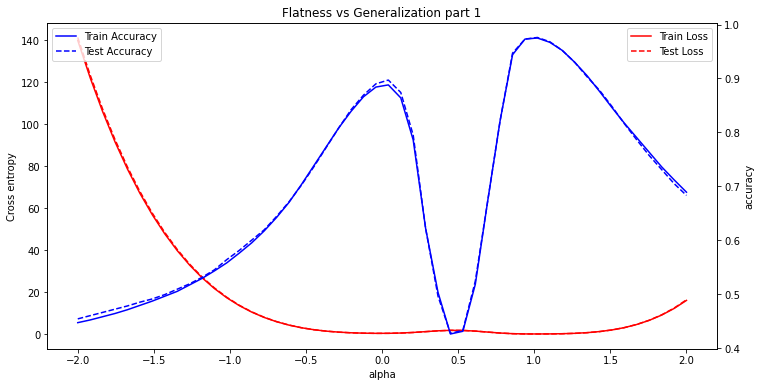

In [448]:
learning_rate = 1e-3
loss_func = nn.CrossEntropyLoss()
model_one = CNN_1().to(device)
optimizer_sgd = torch.optim.SGD(model_one.parameters(), lr=learning_rate)
train_loader, test_loader = batchData(100)
epochs,loss_train,accuracy_train=trainModel(model_one,20)

model1_parameters = torch.nn.utils.parameters_to_vector(model_one.parameters())
learning_rate = 1e-2
loss_func = nn.CrossEntropyLoss()
model_two = CNN_1().to(device)
optimizer_sgd = torch.optim.SGD(model_two.parameters(), lr=learning_rate)
train_loader, test_loader = batchData(100)
epochs,loss_train,accuracy_train=trainModel(model_two,20)


model2_parameters = torch.nn.utils.parameters_to_vector(model_two.parameters())
alpha = np.linspace(-2.0, 2.0, num = 50)
theta_arr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*model1_parameters + alpha[i]* model2_parameters
    theta_arr.append(theta)
    
    
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

for i in range (len(theta_arr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* model1_parameters + alpha[i]*model2_parameters
    model = CNN_1()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    tmp = []
    for param in model.parameters():
        tmp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_func)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_func)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)
    
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r")
plt.plot(alpha, alpha_test_loss_arr, color = "r",linestyle='--')
plt.legend(['Train Loss' , 'Test Loss'])
plt.ylabel('Cross entropy')
plt.xlabel('alpha')
plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "b",linestyle='--')
plt.legend(['Train Accuracy' , 'Test Accuracy'],loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.title('Flatness vs Generalization part 1')